# Correlación con astroML

Primero reproducimos el código sugerido (para entender como funciona)

In [3]:
# Autor original: Jake VanderPlas
# Edición: Missael Barco

# Importamos las librerias y modulos necesarios 
import numpy as np
from matplotlib import pyplot as plt

from astroML.decorators import pickle_results
from astroML.datasets import fetch_sdss_specgals
from astroML.correlation import bootstrap_two_point_angular

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

In [2]:
#Obtenemos los datos (con el mismo corte de calidad)
data = fetch_sdss_specgals()
m_max = 17.7

In [3]:
#Pregunta: ¿Cómo estamos accediendo a los datos si no es un DF?
print(data['petroMag_r'])

[14.841243 17.788576 16.83194  ... 16.651764 17.856642 17.842834]


In [4]:
# Corrimiento al rojo y cortes de magnitud de los datos
data = data[data['z'] > 0.08]
data = data[data['z'] < 0.12]
data = data[data['petroMag_r'] < m_max]

# RA/DEC cortes
RAmin, RAmax = 140, 220
DECmin, DECmax = 5, 45
data = data[data['ra'] < RAmax]
data = data[data['ra'] > RAmin]
data = data[data['dec'] < DECmax]
data = data[data['dec'] > DECmin]

ur = data['modelMag_u'] - data['modelMag_r']
flag_red = (ur > 2.22)
flag_blue = ~flag_red

data_red = data[flag_red]
data_blue = data[flag_blue]

print("Tamaño de los datos:")
print("  Galaxias 'rojas': ", len(data_red))
print("  Galacias 'azules':", len(data_blue))

Tamaño de los datos:
  Galaxias 'rojas':  38017
  Galacias 'azules': 16883


@pickle_results: using precomputed results from 'correlation_functions.pkl'


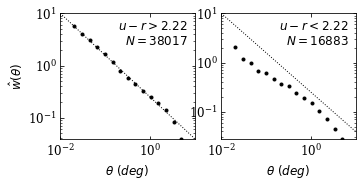

In [5]:
# Configuramos el calculo de la función de correlación
# Como toma mucho tiempo, lo guardamos
#Pregunta: ¿Qué son los archivos .pkl?

@pickle_results("correlation_functions.pkl")

#Cambiamos Nbootstraps = 1 para menor tiempo
def compute_results(Nbins=16, Nbootstraps=1,  method='landy-szalay', rseed=0):
    np.random.seed(rseed)
    bins = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)

    results = [bins]
    for D in [data_red, data_blue]:
        results += bootstrap_two_point_angular(D['ra'],
                                               D['dec'],
                                               bins=bins,
                                               method=method,
                                               Nbootstraps=Nbootstraps)

    return results

(bins, r_corr, r_corr_err, r_bootstraps,
 b_corr, b_corr_err, b_bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
#Graficamos los resultados
corr = [r_corr, b_corr]
corr_err = [r_corr_err, b_corr_err]
bootstraps = [r_bootstraps, b_bootstraps]
labels = ['$u-r > 2.22$\n$N=%i$' % len(data_red),
          '$u-r < 2.22$\n$N=%i$' % len(data_blue)]

fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

for i in range(2):
    ax = fig.add_subplot(121 + i, xscale='log', yscale='log')

    ax.errorbar(bin_centers, corr[i], corr_err[i],
                fmt='.k', ecolor='gray', lw=1)

    t = np.array([0.01, 10])
    ax.plot(t, 10 * (t / 0.01) ** -0.8, ':k', linewidth=1)

    ax.text(0.95, 0.95, labels[i],
            ha='right', va='top', transform=ax.transAxes)
    ax.set_xlabel(r'$\theta\ (deg)$')
    if i == 0:
        ax.set_ylabel(r'$\hat{w}(\theta)$')


plt.show()

## Funciones para ver correlación

In [5]:
def ver_correlacion(y, l, limit = [-1, 1]):
    
    '''
    DESCRIPTION: Grafica funcionde correlacion
    IN: y = array con resultados
        l = máximo tamaño de r
        limit = limites de la gráfica en y
    OUT: Gráfica 
    '''
    
    x = [(x+1)*(l/len(y)) + (l)/len(y)/2 for x in range(len(y))]
    
    plt.plot(x, y, marker = '.', color = 'black')
    plt.xlabel('r')
    plt.ylabel('$\epsilon$(r)')
    plt.title('Correlación vs Distancia')
    plt.ylim(top = max(limit), bottom= min(limit))
    plt.grid(alpha = 0.5)

In [6]:
def ver_r_cuadrada(y, l):
    
    '''
    DESCRIPTION: Grafica funcionde correlacion contra r^2
    IN: y = array con resultados
        l = máximo tamaño de r
        limit = limites de la gráfica en y
    OUT: Gráfica 
    '''
    
    x = np.array([(x+1)*(l/len(y)) + (l)/len(y)/2 for x in range(len(y))])
    
    plt.plot(x, np.array(y)*x**2, marker = '.', color = 'black')
    plt.xlabel('$r$')
    plt.ylabel('$\epsilon$(r)*$r^2$')
    plt.title('Correlación vs Distancia cuadrada')
    plt.grid(alpha = 0.5)

In [7]:
def puntos(n, l = 1, dim=3, seed = 1):
    '''
    DESCRIPTION: Crea un hipercubo de lado L con n puntos con distribución unforme
    IN: n = Número de puntos
        l = Tamaño del lado (default l = 1)
        dim = dimensión del cubo (default dim = 3)
    OUT: numpy array con n puntos
    '''
    np.random.seed(seed)
    return np.random.rand(n, dim)*l

## Uso de función two_point con datos generados

#### Caso con 20k

In [9]:
from random import random
from scipy.interpolate import interp1d
from astroML.correlation import two_point

#Usaermos la función two_point

In [10]:
datos = np.load('../Semana13_Casa/prueba_10k.npy')

In [11]:
aleatorio =  puntos(20000, l = 512, seed = 1)

n_bins = 30
l = 120
bins = [(x+1)*(l)/n_bins for x in range(n_bins+1)]

In [12]:
correlacion = two_point(data = datos, bins= bins, method = "landy-szalay", 
                       data_R = aleatorio)

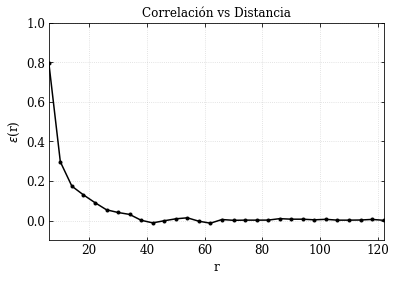

In [13]:
ver_correlacion(correlacion, l = 120, limit = [-0.1, 1])

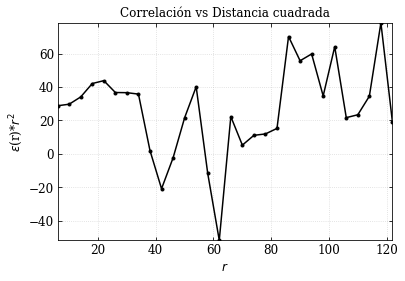

In [14]:
ver_r_cuadrada(correlacion, l)

#### Caso con 250K

In [18]:
datos = np.load('../Semana13_Casa/prueba_250k.npy')

In [19]:
n = len(datos)

In [20]:
aleatorio = puntos(n, l = 512, seed = 1)

n_bins = 35
l = 130
bins = [(x+1)*(l)/n_bins for x in range(n_bins+1)]

In [21]:
correlacion = two_point(data = datos, bins= bins, method = "landy-szalay", 
                       data_R = aleatorio)

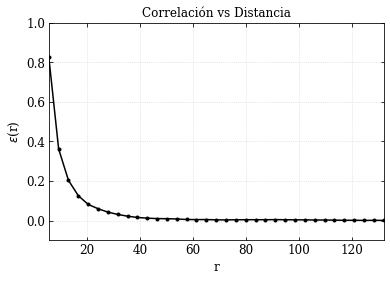

In [22]:
ver_correlacion(correlacion, l = 130, limit = [-0.1, 1])

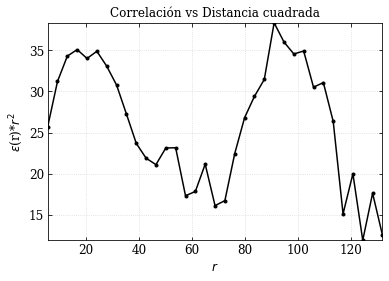

In [24]:
ver_r_cuadrada(correlacion, 130)

#### Comparamos con la gráfica de correlación obtenida anteriormente

In [9]:
propio = np.load('../Semana13_Casa/caso250K_L130_B35.npy')

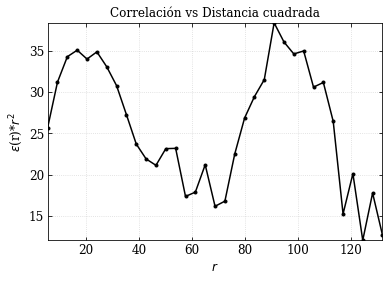

In [10]:
ver_r_cuadrada(propio, 130)

## Función two_point con datos SDSS